# Application of ICP to a generated sample dataset

In [1]:
# Load required packages
import numpy as np
import matplotlib.pyplot as plt
from icp import icp
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import cv2 as cv2
from stl import mesh

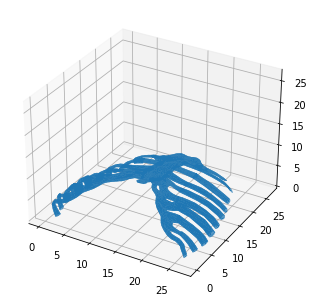

(15519,)


In [2]:
mesh1 = mesh.Mesh.from_file('3D model.STL')
figure = plt.figure()
axes = Axes3D(figure)

# Load the STL files and add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(mesh1.vectors))

# Auto scale to the mesh size
scale = mesh1.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()
print(mesh1.vectors[:,0,0].shape)
mesh2 = np.float64(mesh1)

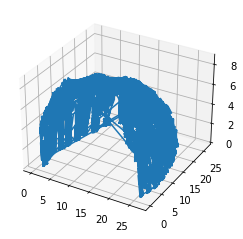

In [3]:
fig = plt.figure()

ax2 = fig.add_subplot(111,projection='3d')
ax2.plot(mesh1.vectors[:,0,0], mesh1.vectors[:,0,1], mesh1.vectors[:,1,2])
# ax2.plot_surface(x, y, z, color='b')
plt.show()

<Figure size 864x648 with 0 Axes>

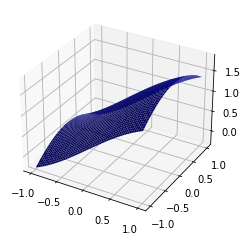

In [2]:
# Generate data
n_dst = 50
x_dst, y_dst = np.meshgrid(np.linspace(-1, 1, n_dst), np.linspace(-1, 1, n_dst), indexing='ij')
z_dst = np.sin(x_dst) + np.cos(y_dst)
plt.figure(figsize=(12, 9))
x = np.array(x_dst)
y = np.array(y_dst)
z = np.array(z_dst)
# plt.pcolor(x_dst, y_dst, z_dst)
# Axes3D.plot_trisurf(x, y, z)
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
# Plot the surface
ax1.plot_surface(x, y, z, color='b')

offset = 0.2
scale = 0.9
n_src = 50
x_src, y_src = np.meshgrid(np.linspace(1, 2, n_src), np.linspace(1, 2, n_src), indexing='ij')
z_src = x_src ** 2 + y_src ** 2 -offset
x_src *= 1 / scale
y_src *= 1 / scale
# plt.figure(figsize=(12, 9))
# plt.(x_src, y_src, z_src)



src = np.column_stack((np.reshape(x_src, (n_src ** 2,)), np.reshape(y_src, (n_src ** 2,)),
                       np.reshape(z_src, (n_src ** 2,))))
src += np.random.normal(loc=0, scale=0.1, size=(n_src * n_src, 3))
dst = np.column_stack((np.reshape(x_dst, (n_dst ** 2,)), np.reshape(y_dst, (n_dst ** 2,)),
                       np.reshape(z_dst, (n_dst ** 2,))))

plt.show()

In [5]:
print(src.dtype)
print(mesh2[:,0:3].shape)

float64
(15519, 3)


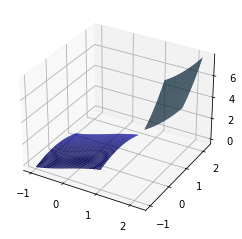

In [3]:
fig = plt.figure()

ax2 = fig.add_subplot(111,projection='3d')
ax2.plot_surface(x_src, y_src, z_src)
ax2.plot_surface(x, y, z, color='b')
plt.show()

In [8]:
# Apply ICP
scale, offset = icp(src, dst, dim_offset='all', dim_scale=[0,1], num_iter=80,use_gpu=True)

100%|██████████| 80/80 [00:07<00:00, 11.40it/s]


In [8]:
# Print results
print('Scale:', scale)
print('Offset:', offset)

Scale: 0.9
Offset: 0.2


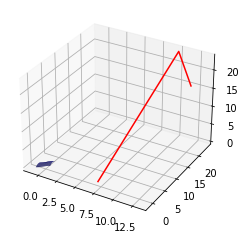

In [9]:
# src1 = (src*scale) + offset
# src1_unstack = np.split(src1,[0,1,2], axis=1)
mesh_unstack = mesh2[:,0:3] * scale + offset
# dst1_unstack[3]
fig = plt.figure()
# ax1 = fig.add_subplot(111, projection='3d')
# Plot the surface

ax2 = fig.add_subplot(111,projection='3d')
ax2.plot(mesh_unstack[1], mesh_unstack[2], mesh_unstack[3],color='red')
ax2.plot_surface(x, y, z, color='b')
plt.show()

In [4]:
x_dst


array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.95918367, -0.95918367, -0.95918367, ..., -0.95918367,
        -0.95918367, -0.95918367],
       [-0.91836735, -0.91836735, -0.91836735, ..., -0.91836735,
        -0.91836735, -0.91836735],
       ...,
       [ 0.91836735,  0.91836735,  0.91836735, ...,  0.91836735,
         0.91836735,  0.91836735],
       [ 0.95918367,  0.95918367,  0.95918367, ...,  0.95918367,
         0.95918367,  0.95918367],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])